In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('New Dataset 5000.csv')

In [3]:
data.head()

StationId        Datetime  PM2.5  PM10    NO    NO2    NOx    NH3    CO  \
0     TG002  5/14/2018 0:00  35.25  88.5  2.12  33.10  19.30  14.10  0.96   
1     TG002  5/14/2018 1:00  32.00  73.5  2.17  20.30  12.60  13.80  0.17   
2     TG002  5/14/2018 2:00  20.50  58.0  3.00  17.35  11.65  13.48  1.53   
3     TG002  5/14/2018 3:00  21.00  50.0  2.73  18.28  11.93  13.50  2.96   
4     TG002  5/14/2018 4:00  18.50  43.5  2.20  16.38  10.45  15.13  3.49   

    SO2     O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  1.97  67.25     4.98     7.43    2.70  168   Moderate  
1  2.77  80.75     3.40     4.27    1.57  124   Moderate  
2  2.95  77.22     2.02     2.55    1.18  124   Moderate  
3  2.02  36.35     1.42     1.57    0.80  124   Moderate  
4  2.20  70.90     1.20     1.10    1.03  124   Moderate

In [5]:
data.shape

(5091, 16)

In [20]:
X = data.iloc[:, 8:9].values  # CO column
y = (data['AQI_Bucket'] == 'Moderate').astype(int)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [22]:
X_train_reshaped = X_train.reshape(-1, 1)
X_test_reshaped = X_test.reshape(-1, 1)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

In [24]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=1.0)  # You can adjust parameters as needed
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [25]:
y_pred = svm_classifier.predict(X_test_scaled)


In [26]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [28]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7679952409280191
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       859
           1       0.78      0.74      0.76       822

    accuracy                           0.77      1681
   macro avg       0.77      0.77      0.77      1681
weighted avg       0.77      0.77      0.77      1681



In [29]:
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10, 100],             # Regularization parameter
    'kernel': ['linear', 'rbf'],        # Kernel type: linear or radial basis function (rbf)
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient for rbf
}

# Initialize the SVM classifier
svm_classifier = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the tuning
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# Use the best model for prediction
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

print("Best Model Accuracy:", accuracy_best)
print("Best Model Classification Report:\n", classification_rep_best)


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Model Accuracy: 0.7691850089232599
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       859
           1       0.78      0.73      0.76       822

    accuracy                           0.77      1681
   macro avg       0.77      0.77      0.77      1681
weighted avg       0.77      0.77      0.77      1681



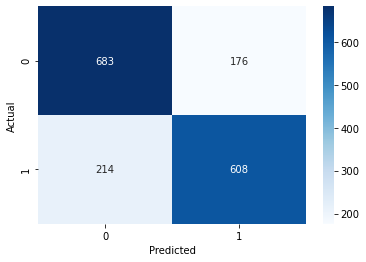

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


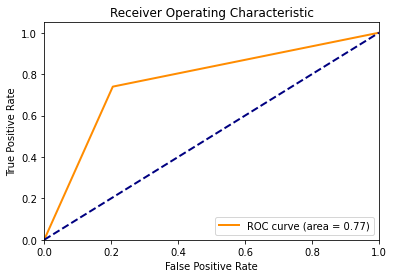

In [43]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_best)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


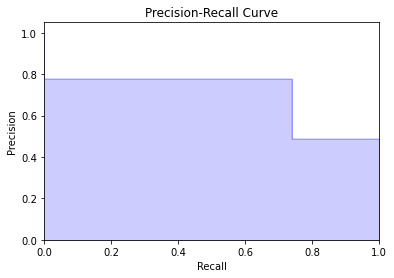

In [44]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_best)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()


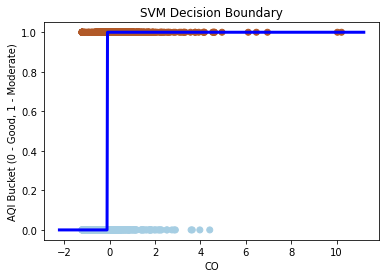

In [46]:
import numpy as np

def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X.min() - 1, X.max() + 1
    xx = np.arange(x_min, x_max, h)
    
    Z = model.predict(xx.reshape(-1, 1))
    
    plt.plot(xx, Z, color='blue', linewidth=3)
    plt.scatter(X, y, c=y, cmap=plt.cm.Paired)
    plt.xlabel('CO')
    plt.ylabel('AQI Bucket (0 - Good, 1 - Moderate)')
    plt.title('SVM Decision Boundary')
    plt.show()

# Assuming you have CO as the only feature for visualization purposes
plot_decision_boundary(X_test_scaled[:, 0], y_test, best_svm)
